# Analyse Exploratoire des Crédits Alloués

Ce Notebook contient une analyse exploratoire des données après la phase de Segmentation (`cash_allocated_data`).

Nous allons examiner les caractéristiques principales des données, visualiser les répartitions et identifier les tendances pertinentes.

In [1]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Charger les données de crédits alloués
cash_allocated_data_path = "../data/processed/cash_allocated_data.csv"
cash_allocated_data = pd.read_csv(cash_allocated_data_path)

# Aperçu des données
cash_allocated_data.head()

,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,Voice_Service_Score,SMS_Service_Score,Digital_Service_Score,Profile_Code,Weighted_Score,Segment,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
0,20240110,C909154549,0,1,1,1952.76,1488.73,0,110.71,63.39,...,2,3,4,33234,43,Low,NaN,NaN,130.0,286.666667
1,20240809,C1185358096,1,1,1,2737.16,157.62,0,486.90,97.69,...,3,3,4,42334,47,High,33.333333,313.333333,NaN,NaN
2,20231213,C135396218,1,1,1,1091.28,1679.70,0,95.44,164.40,...,3,3,2,33332,44,Low,32.083333,293.333333,NaN,NaN
3,20240110,C1225067641,1,1,1,2672.49,1828.85,1,183.03,162.72,...,3,3,5,33335,47,High,NaN,NaN,145.0,313.333333
4,20230515,C444372421,1,0,1,4223.31,1915.18,1,332.88,101.68,...,3,4,3,33343,47,High,33.333333,313.333333,NaN,NaN


In [3]:
# Afficher les informations générales
cash_allocated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351162 entries, 0 to 351161
Data columns (total 96 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   DATE_OF_THE_DAY                               351162 non-null  int64  
 1   SIM_NUMBER                                    351162 non-null  object 
 2   HAS_USED_MOB_MONEY_IN_LAST_30_DAYS            351162 non-null  int64  
 3   HAS_USED_MOB_MONEY_IN_LAST_7_DAYS             351162 non-null  int64  
 4   HAS_USED_MOB_MONEY_IN_LAST_90_DAYS            351162 non-null  int64  
 5   PAID_DATA_VOLUME                              351162 non-null  float64
 6   PAID_VOICE_TRAFFIC                            351162 non-null  float64
 7   HAS_USED_MOB_MONEY_IN_LAST_1_DAY              351162 non-null  int64  
 8   VOICE_REVENUE                                 351162 non-null  float64
 9   DATA_REVENUE                                  35

In [4]:
# Statistiques descriptives
credit_columns = ['Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']
print("Statistiques descriptives des crédits alloués :")
cash_allocated_data[credit_columns].describe()

Statistiques descriptives des crédits alloués :


,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
count,175610.000000,175610.000000,175552.000000,175552.000000
mean,33.070229,309.123664,142.643796,309.144527
std,1.684955,26.959276,15.158336,26.948153
min,26.250000,200.000000,73.750000,186.666667
25%,32.083333,293.333333,133.750000,293.333333
50%,32.916667,306.666667,141.250000,306.666667
75%,34.166667,326.666667,152.500000,326.666667
max,40.833333,433.333333,208.750000,426.666667


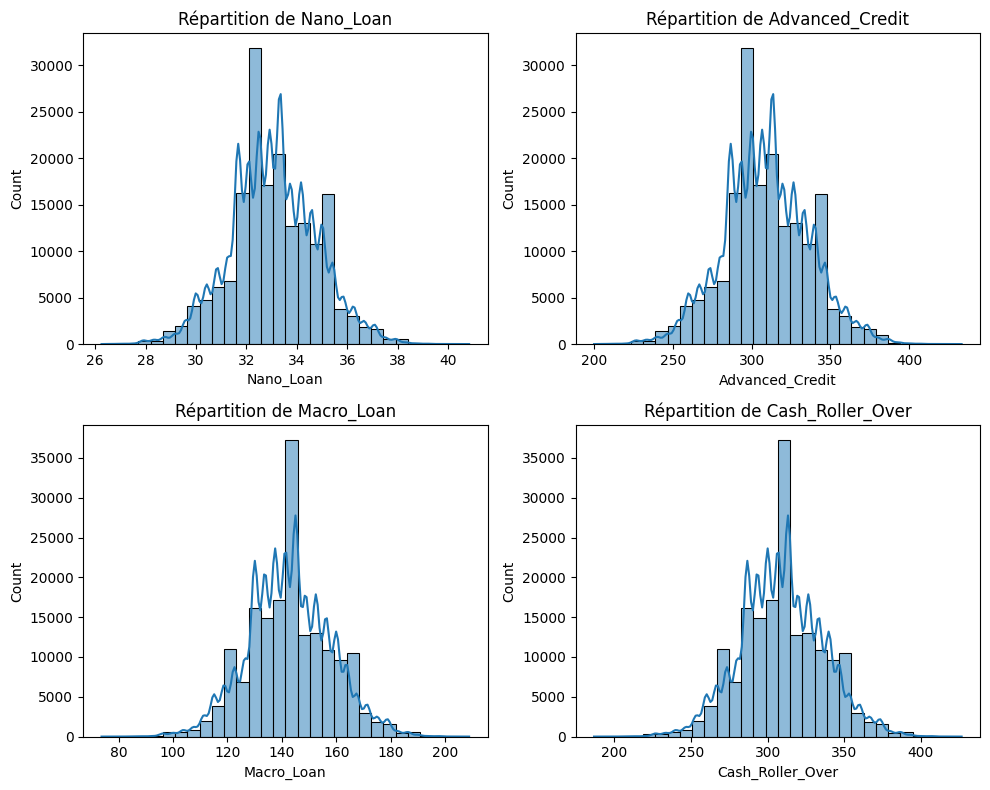

In [5]:
# Visualisation : Histogrammes des crédits
plt.figure(figsize=(10, 8))
for i, col in enumerate(credit_columns, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(cash_allocated_data[col], kde=True, bins=30)
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()
